In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [123]:
dataset=pd.read_csv('International_Breweries.csv')
dataset

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,11143,Jardine,jard@gmail.com,grand malt,90,150,962,144300,57720,Togo,northeast,November,2017
1043,11144,Jardine,jard@gmail.com,trophy,150,200,892,178400,44600,Benin,northcentral,December,2017
1044,11145,Andrews,andy@gmail.com,budweiser,250,500,816,408000,204000,Senegal,Southeast,January,2019
1045,11146,Jones,jone.ai@yahoo.com,castle lite,180,450,939,422550,253530,Ghana,west,February,2017


# Within the last two years, the brand manager wants to know the top three brands consumed in the francophone countries

The dataset does not have a column indicating which countries are anglophone or francophone. Therefore, a column called territory will be created to indicate this

In [4]:
c=[]
for i in dataset['COUNTRIES']:
    if i=='Ghana':
        c.append('Anglophone')
    elif i=='Nigeria':
         c.append('Anglophone')
    else:
         c.append('Francophone')

In [5]:
dataset['TERRITORY']=c

In [6]:
dataset.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone


The dataset is then grouped by territory and brands to indicate the top brands consumed in each territory

In [9]:
x=dataset.groupby(['TERRITORY','BRANDS']).sum()
x

SALES_ID  PLANT_COST  UNIT_PRICE  QUANTITY      COST  \
TERRITORY   BRANDS                                                              
Anglophone  beta malt      637440        4800        9000     50789   7618350   
            budweiser      636990       15000       30000     50572  25286000   
            castle lite    637890       10800       27000     51487  23169150   
            eagle lager    637740       10200       15000     51701  12925250   
            grand malt     637290        5400        9000     50281   7542150   
            hero           637590        9000       12000     51465  10293000   
            trophy         637140        9000       12000     51267  10253400   
Francophone beta malt      945536        7120       13350     74274  11141100   
            budweiser      956535       22500       45000     75702  37851000   
            castle lite    955785       16200       40500     76687  34509150   
            eagle lager    956085       15300       22500     76102  19025500   
            grand malt     945835        8010       13350     76008  11401200   
            hero           945237       13350       17800     77595  15519000   
            trophy         956235       13500       18000     76792  15358400   

                           PROFIT   YEARS  
TERRITORY   BRANDS                         
Anglophone  beta malt     3555230  121080  
            budweiser    12643000  121075  
            castle lite  13901490  121069  
            eagle lager   4136080  121072  
            grand malt    3016860  121083  
            hero          2573250  121087  
            trophy        2563350  121079  
Francophone beta malt     5199180  179585  
            budweiser    18925500  181609  
            castle lite  20705490  181616  
            eagle lager   6088160  181617  
            grand malt    4560480  179598  
            hero          3879750  179595  
            trophy        3839600  181620

In [10]:
x.drop('YEARS',axis=1,inplace=True)

In [17]:
francophone=x.loc['Francophone'].reset_index().sort_values('QUANTITY',ascending=False).head(3)
francophone

,BRANDS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT
5,hero,945237,13350,17800,77595,15519000,3879750
6,trophy,956235,13500,18000,76792,15358400,3839600
2,castle lite,955785,16200,40500,76687,34509150,20705490


In [18]:
francophone.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT'],axis=1,inplace=True)

In [19]:
francophone

,BRANDS,QUANTITY
5,hero,77595
6,trophy,76792
2,castle lite,76687


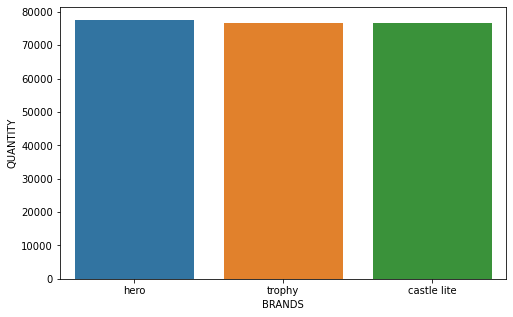

In [289]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'BRANDS', y = 'QUANTITY', data = francophone)

# Find out the top two choice of consumer brands in Ghana

In [20]:
dataset.head(5)

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone


In [21]:
a=dataset.groupby(['COUNTRIES','BRANDS']).sum()
a

SALES_ID  PLANT_COST  UNIT_PRICE  QUANTITY      COST  \
COUNTRIES BRANDS                                                              
Benin     beta malt      308096        2320        4350     23902   3585300   
          budweiser      318495        7500       15000     25156  12578000   
          castle lite    318945        5400       13500     25639  11537550   
          eagle lager    318345        5100        7500     24876   6219000   
          grand malt     318645        2700        4500     24967   3745050   
          hero           318795        4500        6000     26126   5225200   
          trophy         319095        4500        6000     25658   5131600   
Ghana     beta malt      318405        2400        4500     25408   3811200   
          budweiser      318705        7500       15000     24419  12209500   
          castle lite    319155        5400       13500     25806  11612700   
          eagle lager    318555        5100        7500     25829   6457250   
          grand malt     318855        2700        4500     25615   3842250   
          hero           319005        4500        6000     25654   5130800   
          trophy         318255        4500        6000     25524   5104800   
Nigeria   beta malt      319035        2400        4500     25381   3807150   
          budweiser      318285        7500       15000     26153  13076500   
          castle lite    318735        5400       13500     25681  11556450   
          eagle lager    319185        5100        7500     25872   6468000   
          grand malt     318435        2700        4500     24666   3699900   
          hero           318585        4500        6000     25811   5162200   
          trophy         318885        4500        6000     25743   5148600   
Senegal   beta malt      318825        2400        4500     25625   3843750   
          budweiser      319125        7500       15000     25923  12961500   
          castle lite    318525        5400       13500     25974  11688300   
          eagle lager    318975        5100        7500     25771   6442750   
          grand malt     308125        2610        4350     25428   3814200   
          hero           318375        4500        6000     26632   5326400   
          trophy         318675        4500        6000     25575   5115000   
Togo      beta malt      318615        2400        4500     24747   3712050   
          budweiser      318915        7500       15000     24623  12311500   
          castle lite    318315        5400       13500     25074  11283300   
          eagle lager    318765        5100        7500     25455   6363750   
          grand malt     319065        2700        4500     25613   3841950   
          hero           308067        4350        5800     24837   4967400   
          trophy         318465        4500        6000     25559   5111800   

                        PROFIT  YEARS  
COUNTRIES BRANDS                       
Benin     beta malt    1673140  58513  
          budweiser    6289000  60536  
          castle lite  6922530  60535  
          eagle lager  1990080  60537  
          grand malt   1498020  60543  
          hero         1306300  60538  
          trophy       1282900  60541  
Ghana     beta malt    1778560  60540  
          budweiser    6104750  60543  
          castle lite  6967620  60536  
          eagle lager  2066320  60536  
          grand malt   1536900  60544  
          hero         1282700  60547  
          trophy       1276200  60542  
Nigeria   beta malt    1776670  60540  
          budweiser    6538250  60532  
          castle lite  6933870  60533  
          eagle lager  2069760  60536  
          grand malt   1479960  60539  
          hero         1290550  60540  
          trophy       1287150  60537  
Senegal   beta malt    1793750  60535  
          budweiser    6480750  60536  
          castle lite  7012980  60538  
          eagle lager  2061680  60542  
          grand mal

In [28]:
Ghana=a.loc['Ghana'].sort_values('QUANTITY',ascending=False)
Ghana

,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
BRANDS,,,,,,,
eagle lager,318555,5100,7500,25829,6457250,2066320,60536
castle lite,319155,5400,13500,25806,11612700,6967620,60536
hero,319005,4500,6000,25654,5130800,1282700,60547
grand malt,318855,2700,4500,25615,3842250,1536900,60544
trophy,318255,4500,6000,25524,5104800,1276200,60542
beta malt,318405,2400,4500,25408,3811200,1778560,60540
budweiser,318705,7500,15000,24419,12209500,6104750,60543


In [29]:
Ghana.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT','YEARS'],axis=1,inplace=True)

In [30]:
Ghana.reset_index()

,BRANDS,QUANTITY
0,eagle lager,25829
1,castle lite,25806
2,hero,25654
3,grand malt,25615
4,trophy,25524
5,beta malt,25408
6,budweiser,24419


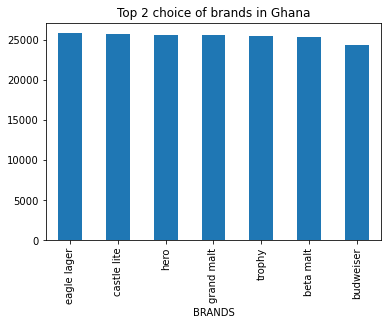

In [31]:
Ghana['QUANTITY'].plot(kind='bar',title='Top 2 choice of brands in Ghana')

The bar chart is not really showing the minute difference between the two brands, A pie chart may be more appropiate

In [46]:
Ghana.index

Index(['eagle lager', 'castle lite', 'hero', 'grand malt', 'trophy',
       'beta malt', 'budweiser'],
      dtype='object', name='BRANDS')

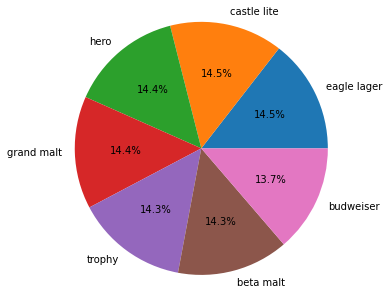

In [54]:
plt.figure(figsize=(5,5))
plt.pie(Ghana['QUANTITY'],autopct='%1.1f%%', shadow=False, labels=Ghana.index)
plt.axis('equal')
plt.show()

From the pie chart, it can be seen that Eagle Lager and Castle Lite are the highest quantity requested 

# Find out the details of beers consumed in the past three years in the most oil reach country in West Africa.

In [150]:
dataset.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


Additional column is needed to indicate the whether the brand is a beer or a malt(this is based on domain knowledge)

In [151]:
b=[]
for i in dataset['BRANDS']:
    if i=='beta malt':
       b.append('Malt') 
    elif i=='grand malt':
        b.append('Malt')
    else: b.append('Beer')

In [152]:
dataset['Brand_seg']=b

In [59]:
a=dataset.groupby(['COUNTRIES','Brand_seg']).sum().loc['Nigeria'].reset_index()
a

,Brand_seg,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
0,Beer,1593675,27000,48000,129260,41411750,18119580,302678
1,Malt,637470,5100,9000,50047,7507050,3256630,121079


In [62]:
a.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT','YEARS'],axis=1,inplace=True)

In [63]:
a

,Brand_seg,QUANTITY
0,Beer,129260
1,Malt,50047


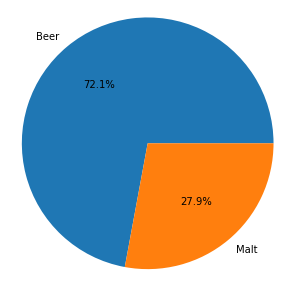

In [64]:
plt.figure(figsize=(5,5))
plt.pie(a['QUANTITY'],autopct='%1.1f%%', shadow=False, labels=a['Brand_seg'])
plt.axis('equal')
plt.show()

# Favorites malt brand in Anglophone region between 2018 and 2019

In [91]:
dataset.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY,Brand_seg
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone,Beer
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone,Beer
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone,Beer
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone,Beer
5,10106,Jardine,jard@gmail.com,beta malt,80,150,798,119700,55860,Ghana,northcentral,June,2019,Anglophone,Malt


drop any row with year less than 2018, i.e 2017

In [92]:
b=dataset.drop(dataset[dataset.YEARS < 2018].index, inplace=True)
b

In [93]:
b=dataset.groupby(['Brand_seg','TERRITORY','BRANDS']).sum().loc['Malt','Anglophone'].reset_index()

In [94]:
b

,BRANDS,SALES_ID,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,YEARS
0,beta malt,402333,3040,5700,32118,4817700,2248260,76706
1,grand malt,426694,3600,6000,33221,4983150,1993260,80743


In [95]:
b.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT','YEARS'],axis=1,inplace=True)

In [96]:
b

,BRANDS,QUANTITY
0,beta malt,32118
1,grand malt,33221


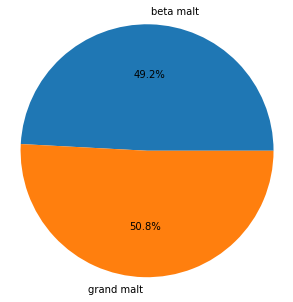

In [97]:
plt.figure(figsize=(5,5))
plt.pie(b['QUANTITY'],autopct='%1.1f%%', shadow=False, labels=b['BRANDS'])
plt.axis('equal')
plt.show()

Of the two malt brands, grandmalt has a slightly higher quantity sold compared to beta malt

# Which brands sold the highest in 2019 in Nigeria?

In [98]:
dataset.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY,Brand_seg
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone,Beer
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone,Beer
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone,Beer
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone,Beer
5,10106,Jardine,jard@gmail.com,beta malt,80,150,798,119700,55860,Ghana,northcentral,June,2019,Anglophone,Malt


In [100]:
dataset1=dataset.copy()
dataset1.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY,Brand_seg
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone,Beer
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone,Beer
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone,Beer
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone,Beer
5,10106,Jardine,jard@gmail.com,beta malt,80,150,798,119700,55860,Ghana,northcentral,June,2019,Anglophone,Malt


A copy of the dataset is made, so as not to contanimate the original dataset and years not equal to 2019 is dropped

In [101]:
dataset1.drop(dataset1[dataset1.YEARS != 2019].index,inplace=True)
dataset1

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY,Brand_seg
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone,Beer
5,10106,Jardine,jard@gmail.com,beta malt,80,150,798,119700,55860,Ghana,northcentral,June,2019,Anglophone,Malt
8,10109,Morgan,morganny@gmail.com,budweiser,250,500,700,350000,175000,Benin,southsouth,September,2019,Francophone,Beer
11,10112,Jones,jone.ai@yahoo.com,hero,150,200,902,180400,45100,Nigeria,northcentral,December,2019,Anglophone,Beer
15,10116,Jones,jone.ai@yahoo.com,budweiser,250,500,709,354500,177250,Ghana,northwest,April,2019,Anglophone,Beer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,11136,Morgan,morganny@gmail.com,grand malt,90,150,963,144450,57780,Ghana,northwest,April,2019,Anglophone,Malt
1037,11138,Sorvino,sorvi2000@gmail.com,budweiser,250,500,839,419500,209750,Togo,northcentral,June,2019,Francophone,Beer
1040,11141,Thompson,thomp@uk.com,hero,150,200,903,180600,45150,Ghana,southsouth,September,2019,Anglophone,Beer
1044,11145,Andrews,andy@gmail.com,budweiser,250,500,816,408000,204000,Senegal,Southeast,January,2019,Francophone,Beer


Countries not equal to Nigeria is also dropped 

In [103]:
dataset1.drop(dataset1[dataset1.COUNTRIES!='Nigeria'].index,inplace=True)
dataset1.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,TERRITORY,Brand_seg
11,10112,Jones,jone.ai@yahoo.com,hero,150,200,902,180400,45100,Nigeria,northcentral,December,2019,Anglophone,Beer
51,10152,Parent,parentty@uk.com,castle lite,180,450,878,395100,237060,Nigeria,northwest,April,2019,Anglophone,Beer
66,10167,Andrews,andy@gmail.com,eagle lager,170,250,769,192250,61520,Nigeria,Southeast,July,2019,Anglophone,Beer
81,10182,Andrews,andy@gmail.com,hero,150,200,773,154600,38650,Nigeria,northwest,October,2019,Anglophone,Beer
91,10192,Jardine,jard@gmail.com,trophy,150,200,981,196200,49050,Nigeria,west,August,2019,Anglophone,Beer


In [107]:
dataset1.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT','YEARS'],axis=1,inplace=True)

In [110]:
C=dataset1.groupby('BRANDS').sum().reset_index()
C.sort_values('QUANTITY',ascending=False)

,BRANDS,QUANTITY
5,hero,9622
3,eagle lager,8401
0,beta malt,8389
4,grand malt,8125
6,trophy,5803
1,budweiser,5490
2,castle lite,3388


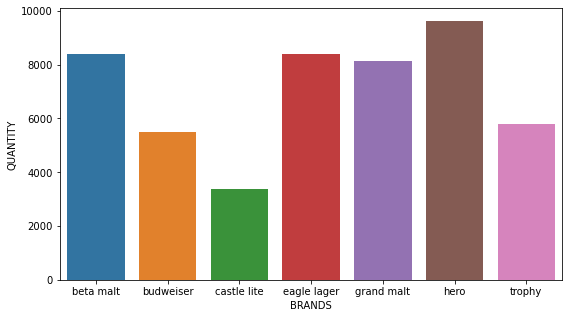

In [111]:
plt.figure(figsize=(9,5))
sns.barplot(x='BRANDS',y='QUANTITY', data=C)

From the chart, Hero sold the highest in Nigeria in year 2019

# Favorites brand in South_South region in Nigeria

In [137]:
dataset.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


In [138]:
dataset2=dataset.copy()

it was observed that the region column in the main dataset has a space between it

In [139]:
dataset2['REGION']=dataset['REGION ']

In [140]:
dataset2.drop(dataset2[dataset2.COUNTRIES!='Nigeria'].index, inplace=True)
dataset2

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,REGION
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,west
6,10107,Thompson,thomp@uk.com,grand malt,90,150,954,143100,57240,Nigeria,Southeast,July,2017,Southeast
11,10112,Jones,jone.ai@yahoo.com,hero,150,200,902,180400,45100,Nigeria,northcentral,December,2019,northcentral
16,10117,Parent,parentty@uk.com,castle lite,180,450,837,376650,225990,Nigeria,northeast,May,2017,northeast
21,10122,Smith,smithMan@yahoo.com,trophy,150,200,860,172000,43000,Nigeria,northwest,October,2018,northwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,11127,Jones,jone.ai@yahoo.com,hero,150,200,731,146200,36550,Nigeria,Southeast,July,2018,Southeast
1031,11132,Gill,gillhell@uk.com,castle lite,180,450,721,324450,194670,Nigeria,northcentral,December,2018,northcentral
1036,11137,Kivell,kivel_go@yahoo.com,trophy,150,200,974,194800,48700,Nigeria,northeast,May,2017,northeast
1041,11142,Andrews,andy@gmail.com,beta malt,80,150,740,111000,51800,Nigeria,northwest,October,2018,northwest


In [142]:
dataset2.drop(dataset2[dataset2.REGION != 'southsouth'].index,inplace=True)
dataset2

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,REGION
26,10127,Howard,howard_freeman@yahoo.com,beta malt,80,150,982,147300,68740,Nigeria,southsouth,March,2017,southsouth
56,10157,Jones,jone.ai@yahoo.com,trophy,150,200,920,184000,46000,Nigeria,southsouth,September,2018,southsouth
86,10187,Gill,gillhell@uk.com,castle lite,180,450,879,395550,237330,Nigeria,southsouth,March,2018,southsouth
116,10217,Howard,howard_freeman@yahoo.com,hero,150,200,957,191400,47850,Nigeria,southsouth,September,2019,southsouth
146,10247,Jardine,jard@gmail.com,grand malt,90,150,754,113100,45240,Nigeria,southsouth,March,2019,southsouth
176,10277,Gill,gillhell@uk.com,budweiser,250,500,850,425000,212500,Nigeria,southsouth,September,2017,southsouth
206,10307,Thompson,thomp@uk.com,eagle lager,170,250,841,210250,67280,Nigeria,southsouth,March,2017,southsouth
236,10337,Jones,jone.ai@yahoo.com,beta malt,80,150,827,124050,57890,Nigeria,southsouth,September,2019,southsouth
266,10367,Jones,jone.ai@yahoo.com,trophy,150,200,912,182400,45600,Nigeria,southsouth,March,2017,southsouth
296,10397,Jones,jone.ai@yahoo.com,castle lite,180,450,922,414900,248940,Nigeria,southsouth,September,2017,southsouth


In [143]:
dataset2.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT','YEARS','REGION '],axis=1, inplace=True)

In [144]:
a=dataset2.groupby('BRANDS').sum().reset_index()
a

,BRANDS,QUANTITY
0,beta malt,4257
1,budweiser,4328
2,castle lite,4287
3,eagle lager,4551
4,grand malt,3914
5,hero,4456
6,trophy,4468


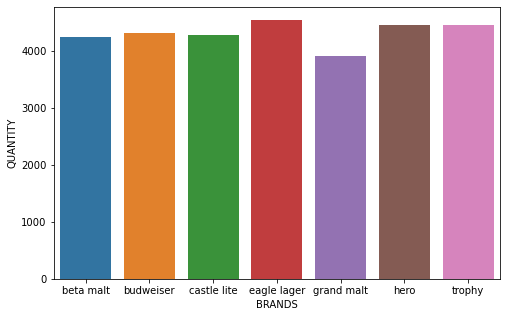

In [145]:
plt.figure(figsize=(8,5))
sns.barplot(x='BRANDS',y='QUANTITY',data=a)

The Favorite Brand in south_south Nigeria is eagle lager

# Beer consumption in Nigeria

In [153]:
dataset

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,Brand_seg
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Beer
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Beer
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Beer
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Beer
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Beer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,11143,Jardine,jard@gmail.com,grand malt,90,150,962,144300,57720,Togo,northeast,November,2017,Malt
1043,11144,Jardine,jard@gmail.com,trophy,150,200,892,178400,44600,Benin,northcentral,December,2017,Beer
1044,11145,Andrews,andy@gmail.com,budweiser,250,500,816,408000,204000,Senegal,Southeast,January,2019,Beer
1045,11146,Jones,jone.ai@yahoo.com,castle lite,180,450,939,422550,253530,Ghana,west,February,2017,Beer


In [154]:
dataset3=dataset.copy()
dataset3.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,Brand_seg
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Beer
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Beer
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Beer
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Beer
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Beer


In [155]:
dataset3.drop(dataset3[dataset3.COUNTRIES!='Nigeria'].index,inplace=True)
dataset3

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,Brand_seg
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Beer
6,10107,Thompson,thomp@uk.com,grand malt,90,150,954,143100,57240,Nigeria,Southeast,July,2017,Malt
11,10112,Jones,jone.ai@yahoo.com,hero,150,200,902,180400,45100,Nigeria,northcentral,December,2019,Beer
16,10117,Parent,parentty@uk.com,castle lite,180,450,837,376650,225990,Nigeria,northeast,May,2017,Beer
21,10122,Smith,smithMan@yahoo.com,trophy,150,200,860,172000,43000,Nigeria,northwest,October,2018,Beer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,11127,Jones,jone.ai@yahoo.com,hero,150,200,731,146200,36550,Nigeria,Southeast,July,2018,Beer
1031,11132,Gill,gillhell@uk.com,castle lite,180,450,721,324450,194670,Nigeria,northcentral,December,2018,Beer
1036,11137,Kivell,kivel_go@yahoo.com,trophy,150,200,974,194800,48700,Nigeria,northeast,May,2017,Beer
1041,11142,Andrews,andy@gmail.com,beta malt,80,150,740,111000,51800,Nigeria,northwest,October,2018,Malt


In [156]:
c=dataset3.groupby('Brand_seg').sum().reset_index()

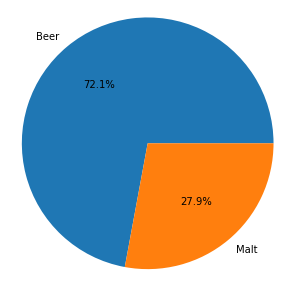

In [157]:
plt.figure(figsize=(5,5))
plt.pie(c['QUANTITY'],autopct='%1.1f%%', shadow=False, labels=c['Brand_seg'])
plt.axis('equal')
plt.show()

Beer brands are more consumed in Nigeria, as compared to Malt brands

# Level of consumption of Budweiser in the regions in Nigeria

In [158]:
dataset4=dataset3.copy()
dataset4

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,Brand_seg
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Beer
6,10107,Thompson,thomp@uk.com,grand malt,90,150,954,143100,57240,Nigeria,Southeast,July,2017,Malt
11,10112,Jones,jone.ai@yahoo.com,hero,150,200,902,180400,45100,Nigeria,northcentral,December,2019,Beer
16,10117,Parent,parentty@uk.com,castle lite,180,450,837,376650,225990,Nigeria,northeast,May,2017,Beer
21,10122,Smith,smithMan@yahoo.com,trophy,150,200,860,172000,43000,Nigeria,northwest,October,2018,Beer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,11127,Jones,jone.ai@yahoo.com,hero,150,200,731,146200,36550,Nigeria,Southeast,July,2018,Beer
1031,11132,Gill,gillhell@uk.com,castle lite,180,450,721,324450,194670,Nigeria,northcentral,December,2018,Beer
1036,11137,Kivell,kivel_go@yahoo.com,trophy,150,200,974,194800,48700,Nigeria,northeast,May,2017,Beer
1041,11142,Andrews,andy@gmail.com,beta malt,80,150,740,111000,51800,Nigeria,northwest,October,2018,Malt


In [159]:
dataset4.drop(dataset4[dataset4.BRANDS != 'budweiser'].index, inplace=True)
dataset4

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,Brand_seg
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Beer
36,10137,Thompson,thomp@uk.com,budweiser,250,500,821,410500,205250,Nigeria,Southeast,January,2017,Beer
71,10172,Jones,jone.ai@yahoo.com,budweiser,250,500,869,434500,217250,Nigeria,northcentral,December,2018,Beer
106,10207,Jones,jone.ai@yahoo.com,budweiser,250,500,990,495000,247500,Nigeria,northeast,November,2019,Beer
141,10242,Gill,gillhell@uk.com,budweiser,250,500,975,487500,243750,Nigeria,northwest,October,2017,Beer
176,10277,Gill,gillhell@uk.com,budweiser,250,500,850,425000,212500,Nigeria,southsouth,September,2017,Beer
211,10312,Jones,jone.ai@yahoo.com,budweiser,250,500,937,468500,234250,Nigeria,west,August,2018,Beer
246,10347,Kivell,kivel_go@yahoo.com,budweiser,250,500,702,351000,175500,Nigeria,Southeast,July,2018,Beer
281,10382,Howard,howard_freeman@yahoo.com,budweiser,250,500,863,431500,215750,Nigeria,northcentral,June,2017,Beer
316,10417,Howard,howard_freeman@yahoo.com,budweiser,250,500,886,443000,221500,Nigeria,northeast,May,2017,Beer


In [161]:
c=dataset4.groupby('REGION ').sum().reset_index()
c.drop(['SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT','YEARS'],axis=1,inplace=True)

In [162]:
c

,REGION,QUANTITY
0,Southeast,4113
1,northcentral,4498
2,northeast,4320
3,northwest,4274
4,southsouth,4328
5,west,4620


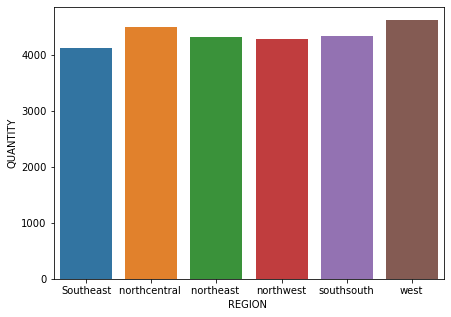

In [163]:
plt.figure(figsize=(7,5))
sns.barplot(x='REGION ',y='QUANTITY',data=c)

insight: Budwiser beer is most consumed in the west region of Nigeria 

# Level of consumption of Budweiser in the regions in Nigeria in 2019

In [164]:
dataset4.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,Brand_seg
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Beer
36,10137,Thompson,thomp@uk.com,budweiser,250,500,821,410500,205250,Nigeria,Southeast,January,2017,Beer
71,10172,Jones,jone.ai@yahoo.com,budweiser,250,500,869,434500,217250,Nigeria,northcentral,December,2018,Beer
106,10207,Jones,jone.ai@yahoo.com,budweiser,250,500,990,495000,247500,Nigeria,northeast,November,2019,Beer
141,10242,Gill,gillhell@uk.com,budweiser,250,500,975,487500,243750,Nigeria,northwest,October,2017,Beer


In [165]:
dataset4.drop(dataset4[dataset4.YEARS != 2019].index, inplace=True)
dataset4

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,Brand_seg
106,10207,Jones,jone.ai@yahoo.com,budweiser,250,500,990,495000,247500,Nigeria,northeast,November,2019,Beer
456,10557,Gill,gillhell@uk.com,budweiser,250,500,902,451000,225500,Nigeria,Southeast,January,2019,Beer
561,10662,Howard,howard_freeman@yahoo.com,budweiser,250,500,948,474000,237000,Nigeria,northwest,October,2019,Beer
631,10732,Jones,jone.ai@yahoo.com,budweiser,250,500,884,442000,221000,Nigeria,west,August,2019,Beer
876,10977,Gill,gillhell@uk.com,budweiser,250,500,919,459500,229750,Nigeria,Southeast,January,2019,Beer
1016,11117,Smith,smithMan@yahoo.com,budweiser,250,500,847,423500,211750,Nigeria,southsouth,September,2019,Beer


In [167]:
e=dataset4.groupby('REGION ').sum().reset_index()
e.drop(['YEARS','SALES_ID','PLANT_COST','UNIT_PRICE','COST','PROFIT'],axis=1,inplace=True)
e

,REGION,QUANTITY
0,Southeast,1821
1,northeast,990
2,northwest,948
3,southsouth,847
4,west,884


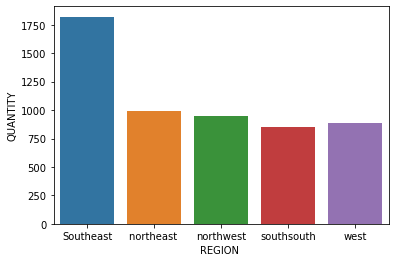

In [168]:
sns.barplot(x="REGION ",y='QUANTITY', data=e)

In [ ]:
Insight: In 2019, Budwiser is mostly consumed in the south-east